In [2]:
import numpy as np
import commands

In [ ]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [3]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [251]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from 'cat_utils.py'>

In [5]:
# LOAD IR CATALOGS OVER 10deg FOV centered at (RA,Dec)=(0,-27deg)

raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
labels = '02a57694o0326I 02a57694o0368I 02a57694o0323I 02a57694o0365I'.split()
ir_cats = [cat_utils.IRCatalog(raw_frames_path,l,\
                             orthofitsimagepath=analysis_root+'/'+l+'/'+l+'_5degframecentered.fits') for l in labels]

loading 02a57694o0326I
identifying and excluding artifacts (ie, saturated pixels)


loading 02a57694o0368I
identifying and excluding artifacts (ie, saturated pixels)


loading 02a57694o0323I
identifying and excluding artifacts (ie, saturated pixels)


loading 02a57694o0365I
identifying and excluding artifacts (ie, saturated pixels)


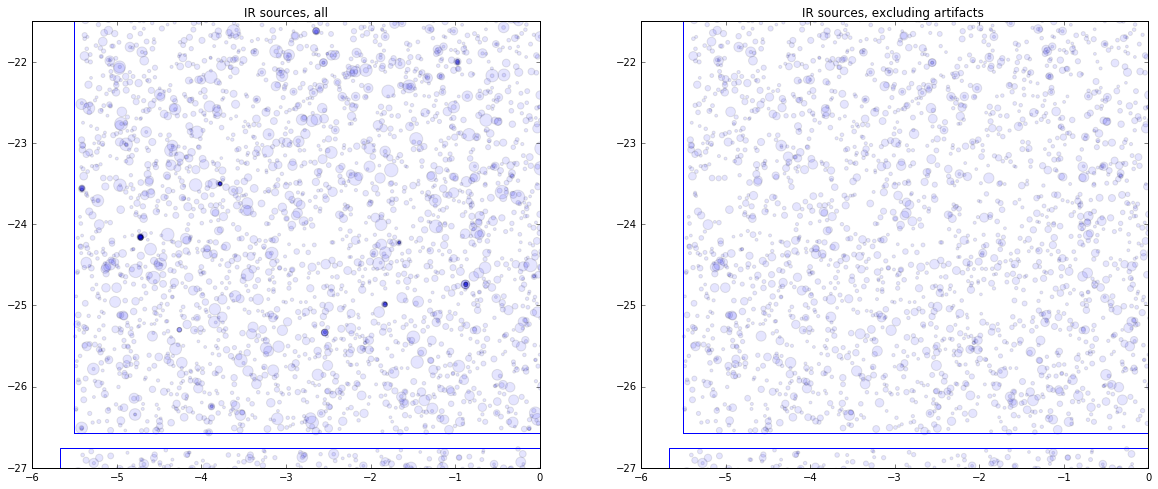

In [6]:
plt.figure(figsize=(20,8))

plt.subplot(121)
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=False)
plt.ylim([-27,-21.5])
plt.xlim([-6,0])
plt.title('IR sources, all')

plt.subplot(122)
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=True)
plt.ylim([-27,-21.5])
plt.xlim([-6,0])
plt.title('IR sources, excluding artifacts ')

(-34, -20)

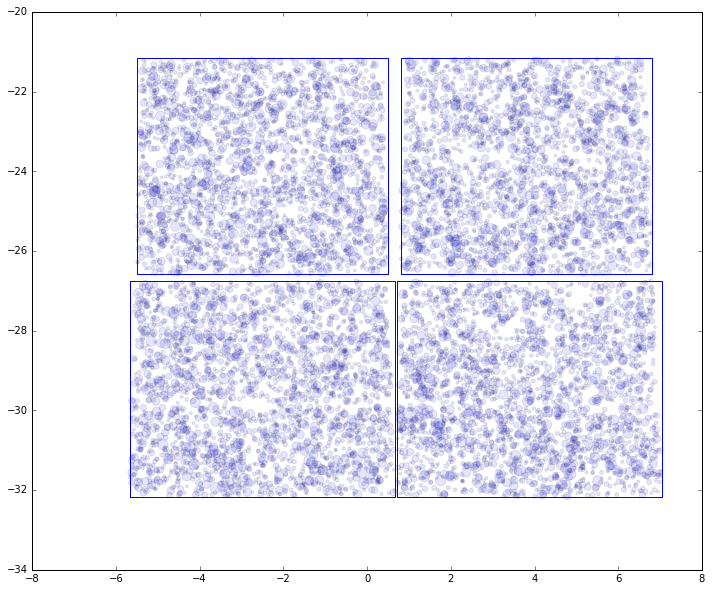

In [7]:
plt.figure(figsize=(12,10))
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4)
plt.xlim([-8,8])
plt.ylim([-34,-20])

In [8]:
# LOAD MWA CATALOG

mwa_cat = cat_utils.MWACatalog('mwa_calibration_source_list.sav')

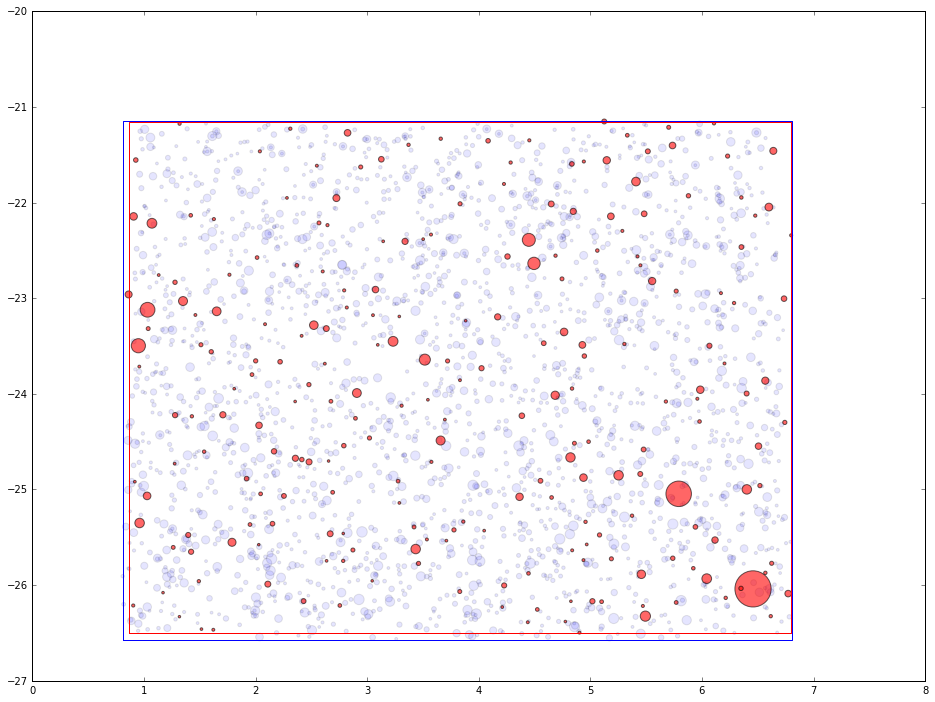

In [69]:
plt.figure(figsize=(16,12))
cat_utils.plot_cat_list(plt,[ir_cats[1],mwa_cat_ir0],[500,60],['b','r'],jymin_vals=[.015,0],alpha_vals=[.1,.6])
# plt.xlim([-8,8])
# plt.ylim([-34,-20])

(30, 31)
(30, 31)


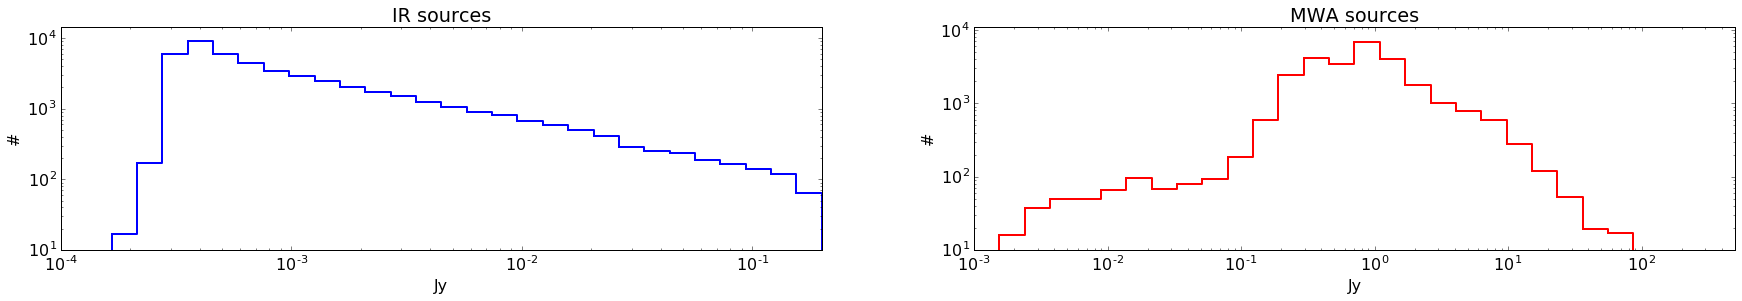

In [245]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(30,4))
plt.subplot(121)
cat_utils.logloghist(ir_cats[0].jy[ir_cats[0].jy<5],.0001,.2,30,'b')
plt.xlim([.0001,.2])#plt.xlim([0,.01])
plt.title('IR sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

plt.subplot(122)
cat_utils.logloghist(mwa_cat.jy[mwa_cat.jy<500],.001,500,30,'r')
plt.xlim([.001,500])
#plt.xlim([0,10])
plt.title('MWA sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

In [233]:
# plt.figure(figsize=(14,6))

# plt.subplot(121)
# plt.imshow(ir_img,interpolation='nearest')
# plt.colorbar()

# plt.subplot(122)
# plt.imshow(mwa_img,interpolation='nearest')
# plt.colorbar()

In [234]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin
num_ir_fields = 4

[0, 0.2, 0, 100]
[0, 0.01, 0, 100]
[0, 0.01, 0, 10]
[0, 0.001, 0, 10]
[0, 0.01, 0, 1.0]
[0, 0.001, 0, 1.0]
[0, 0.001, 0, 0.1]
[0, 0.0005, 0, 0.1]


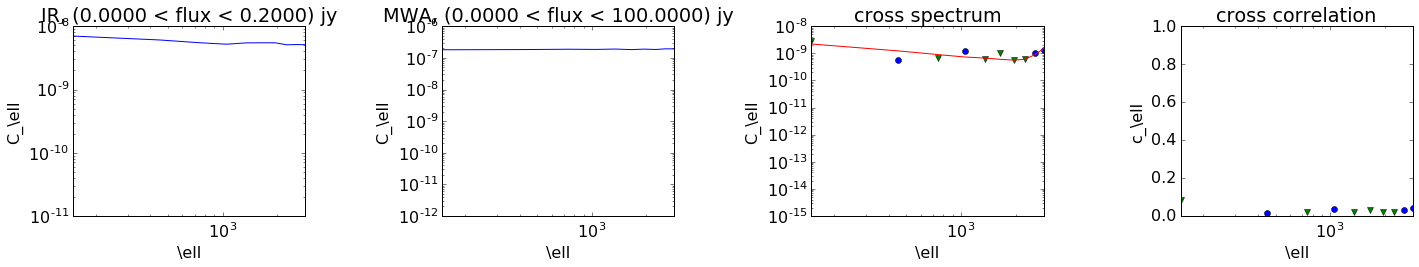

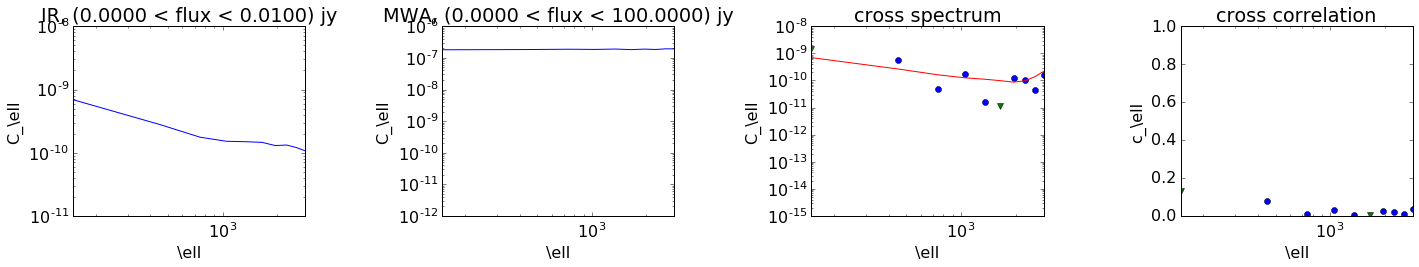

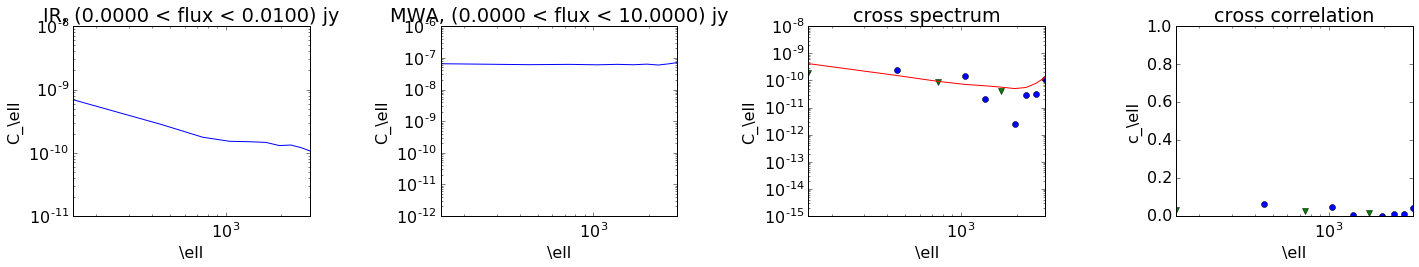

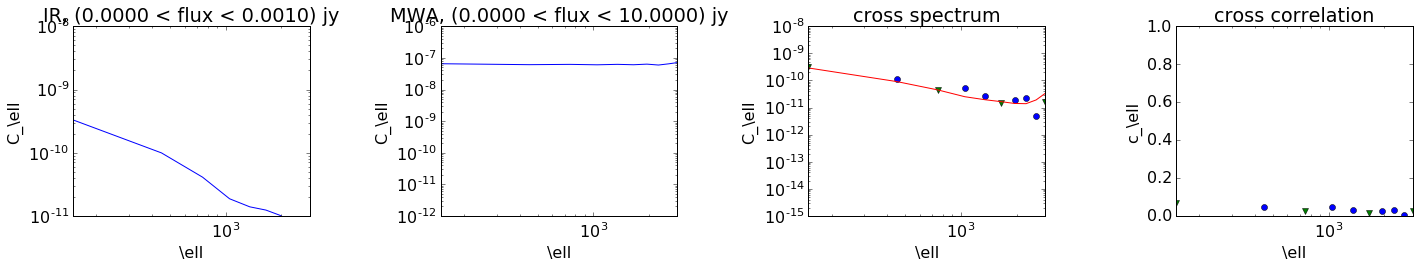

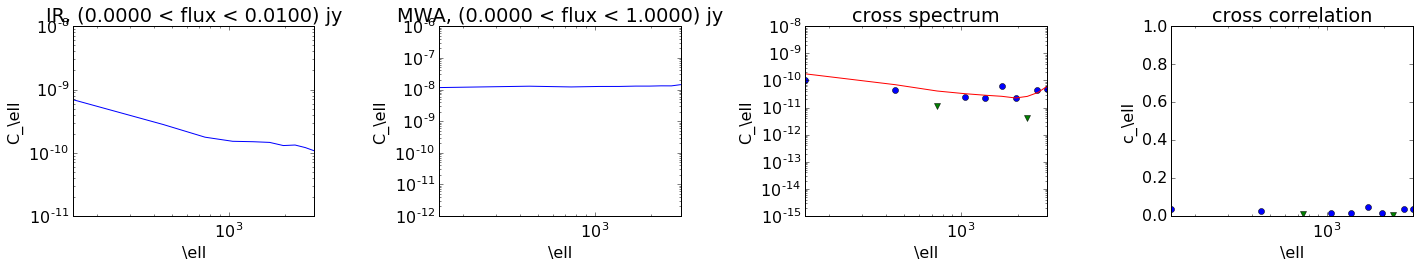

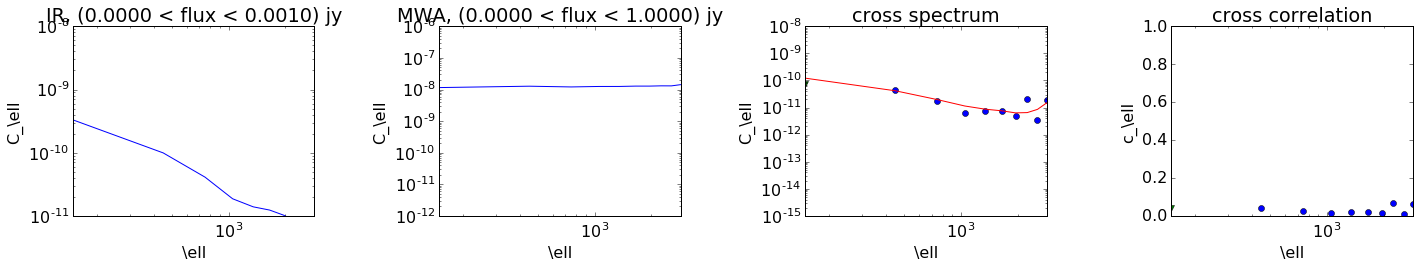

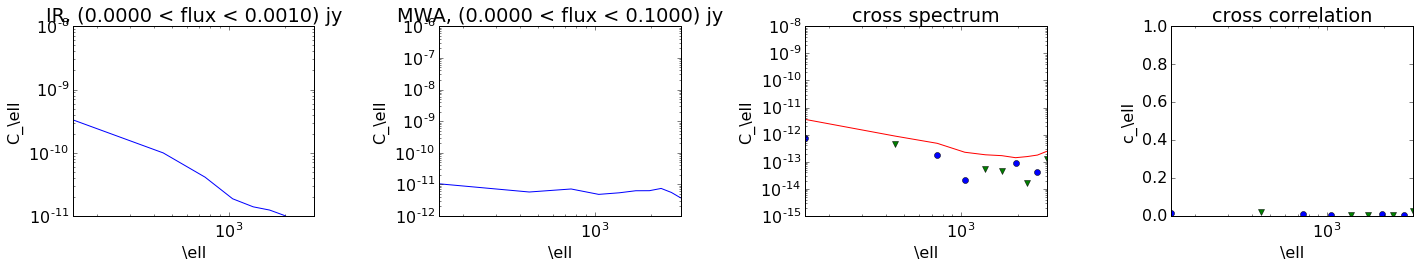

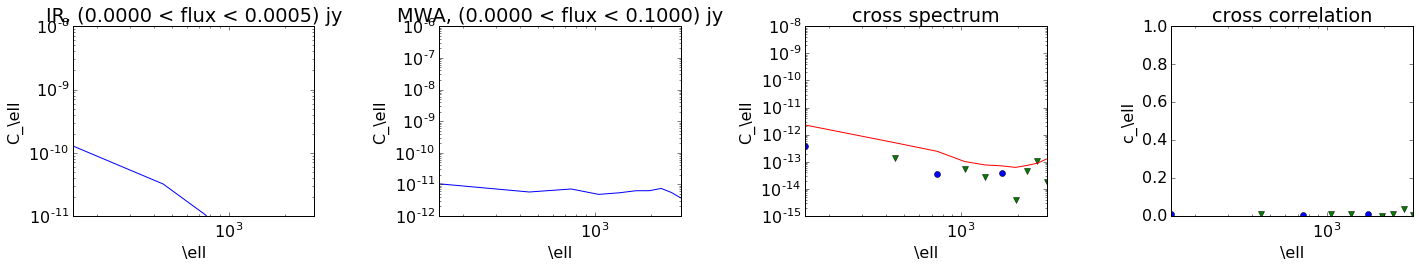

In [252]:
ir_mwa_jymin_max_vals = [
[0,2.e-1,0,100],
[0,1.e-2,0,100],
[0,1.e-2,0,10],
[0,1.e-3,0,10],
[0,1.e-2,0,1.],
[0,1.e-3,0,1.],
[0,1.e-3,0,.1],
[0,.5e-3,0,.1]
]

for paramseti in range(len(ir_mwa_jymin_max_vals)):
    print(ir_mwa_jymin_max_vals[paramseti])
    ir_jymin,ir_jymax,mwa_jymin,mwa_jymax = ir_mwa_jymin_max_vals[paramseti]

    pspec1 = np.zeros(nbins)
    pspec2 = np.zeros(nbins)
    xspec = np.zeros(nbins)
    bin_counts = np.zeros(nbins)
    for fieldi in range(num_ir_fields):
        ir_img = cat_utils.cat2img(ir_cats[fieldi],bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)
        mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[fieldi])
        mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)

        lbins,pspec1_field,pspec2_field,xspec_field,bin_counts_field = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)
        pspec1 += pspec1_field/num_ir_fields
        pspec2 += pspec2_field/num_ir_fields
        xspec += xspec_field/num_ir_fields
        bin_counts += bin_counts_field
        
    cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,ir_mwa_jymin_max_vals[paramseti])